# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Loading the Dataset

In [2]:
data = pd.read_csv("air_quality.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data.shape

(29531, 16)

# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
# checking the null values

data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
# Fill the NAN value wiht Mean value of data

data['PM2.5'].fillna(data['PM2.5'].mean().round(2),inplace = True )
data['PM10'].fillna(data['PM10'].mean().round(2),inplace = True )
data['NO'].fillna(data['NO'].mean().round(2),inplace = True )
data['NO2'].fillna(data['NO2'].mean().round(2),inplace = True )
data['CO'].fillna(data['CO'].mean().round(2),inplace = True )
data['SO2'].fillna(data['SO2'].mean().round(2),inplace = True )
data['O3'].fillna(data['O3'].mean().round(2),inplace = True )
data['NOx'].fillna(data['NOx'].mean().round(2),inplace = True )
data['NH3'].fillna(data['NH3'].mean().round(2),inplace = True )
data['AQI'].fillna(data['AQI'].mean().round(2),inplace = True )

In [7]:
data.isna().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI               0
AQI_Bucket     4681
dtype: int64

In [8]:
# statistical analysis of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,67.450488,59.414476,0.04,32.150,58.03,72.450,949.99
PM10,29531.0,118.128196,71.500953,0.01,79.315,118.13,118.130,1000.00
NO,29531.0,17.574156,21.359220,0.02,6.210,11.53,17.570,390.68
NO2,29531.0,28.560579,22.941051,0.01,12.980,25.24,34.665,362.21
NOx,29531.0,32.309248,29.317936,0.00,14.670,27.55,36.015,467.63
NH3,29531.0,23.482260,20.711370,0.01,12.040,23.48,23.480,352.89
CO,29531.0,2.248696,6.715753,0.00,0.540,0.95,1.710,175.81
SO2,29531.0,14.531719,16.909088,0.01,6.090,10.48,14.530,193.86
O3,29531.0,34.491236,20.163443,0.01,20.740,34.49,42.730,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.080,455.03


# Data Analysis

In [9]:
# Finding the top 10 cities with maximum level of NO2.

city_NO2_values = data.groupby(['City']).NO2.agg([min, max])
city_NO2_values = city_NO2_values.sort_values(['max'],ascending=False)
print("the top 10 cities with maximum level of NO2: ")
city_NO2_values.head(10)

the top 10 cities with maximum level of NO2: 


,min,max
City,,
Gurugram,0.65,362.21
Ahmedabad,0.08,292.02
Patna,0.04,266.46
Amritsar,0.79,237.27
Delhi,10.63,162.50
Kolkata,5.08,150.01
Bengaluru,3.00,142.35
Amaravati,1.52,140.17
Visakhapatnam,0.17,130.26


In [10]:
# Finding the top 10 cities with maximum level of CO.

city_CO_values = data.groupby(['City']).CO.agg([min, max])
city_CO_values = city_CO_values.sort_values(['max'],ascending=False)
print("the top 10 cities with maximum level of CO: ")
city_CO_values.head(10)

the top 10 cities with maximum level of CO: 


,min,max
City,,
Ahmedabad,0.06,175.81
Bengaluru,0.00,48.07
Gurugram,0.00,39.80
Lucknow,0.00,32.22
Delhi,0.00,30.44
Chennai,0.00,20.62
Hyderabad,0.00,8.83
Patna,0.00,8.06
Thiruvananthapuram,0.00,5.59


In [11]:
# Finding the top 10 cities with maximum level of AQI.

city_AQI_values = data.groupby(['City']).mean()["AQI"].round().sort_values(ascending=False)
city_AQI_values.head(10)

City
Ahmedabad       356.0
Delhi           259.0
Patna           225.0
Gurugram        217.0
Lucknow         215.0
Talcher         171.0
Jorapokhar      162.0
Brajrajnagar    154.0
Mumbai          143.0
Kolkata         142.0
Name: AQI, dtype: float64

In [12]:
# function to represent status of city according to AQI index

def aqi_status(aqi_value):  
    if aqi_value['AQI'] > 0 and aqi_value['AQI'] <= 50:
        return 'Good'
    elif aqi_value['AQI'] > 50 and aqi_value['AQI'] <= 100:
        return 'Satisfactory'
    elif aqi_value['AQI'] > 100 and aqi_value['AQI'] <= 200:
        return 'Moderate'
    elif aqi_value['AQI'] > 200 and aqi_value['AQI'] <= 300:
        return 'Poor'
    elif aqi_value['AQI'] > 300 and aqi_value['AQI'] <= 400:
        return 'Very Poor'
    return 'Sever'

In [13]:
Aqi_value = data.groupby('City')['AQI'].mean().round(2)
Aqi_value=Aqi_value.reset_index()
Aqi_value

,City,AQI
0,Ahmedabad,356.14
1,Aizawl,37.10
2,Amaravati,103.53
3,Amritsar,123.54
4,Bengaluru,97.87
5,Bhopal,134.11
6,Brajrajnagar,154.16
7,Chandigarh,97.65
8,Chennai,117.74
9,Coimbatore,83.19


In [14]:
Aqi_value['AQI_Bucket'] = Aqi_value.apply(lambda row: aqi_status(row), axis=1)
Aqi_value.set_index(Aqi_value["City"],inplace=True)
Aqi_value.drop("City",axis=1)

,AQI,AQI_Bucket
City,,
Ahmedabad,356.14,Very Poor
Aizawl,37.10,Good
Amaravati,103.53,Moderate
Amritsar,123.54,Moderate
Bengaluru,97.87,Satisfactory
Bhopal,134.11,Moderate
Brajrajnagar,154.16,Moderate
Chandigarh,97.65,Satisfactory
Chennai,117.74,Moderate


# Data Visualization

Moderate        14
Satisfactory     6
Poor             4
Very Poor        1
Good             1
Name: AQI_Bucket, dtype: int64


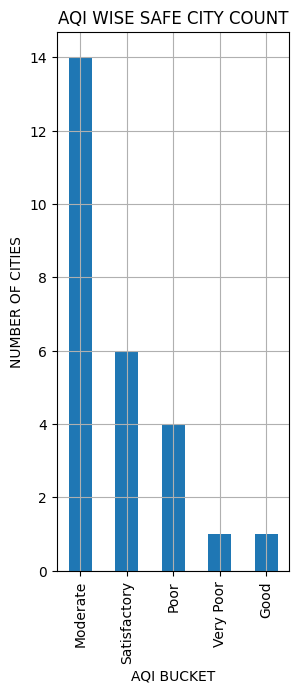

In [15]:
# Plotting the bar plot of  AQI Bucket with repeating count from data.,
count=Aqi_value["AQI_Bucket"].value_counts()
count.plot(figsize=(3,7),kind="bar",title="AQI WISE SAFE CITY COUNT", xlabel="AQI BUCKET", ylabel="NUMBER OF CITIES",grid=True)
print(count)

<AxesSubplot:title={'center':'NO Levels in different cities'}, xlabel='Level', ylabel='City'>

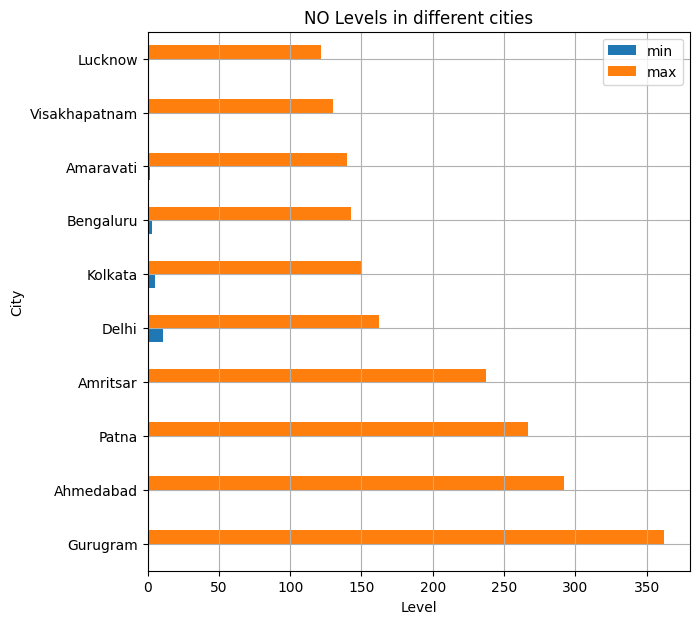

In [16]:
# Plotting the horizontal bar plot for cities against NO level value.
city_NO2_values.head(10).plot(figsize=(7,7),kind="barh",title="NO Levels in different cities",
                              xlabel="Level", ylabel="City",grid=True)

<AxesSubplot:title={'center':'CO Levels in different cities'}, xlabel='Level', ylabel='City'>

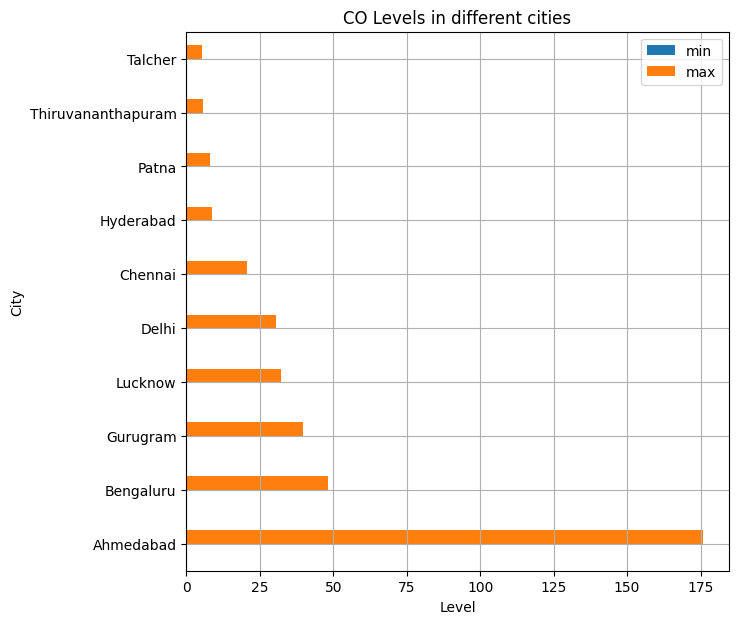

In [17]:
# Plotting the horizontal bar plot for cities against CO level value.
city_CO_values.head(10).plot(figsize=(7,7),kind="barh",title="CO Levels in different cities",
                              xlabel="Level", ylabel="City",grid=True)

<AxesSubplot:title={'center':'aqi Levels in different cities'}, xlabel='Level', ylabel='City'>

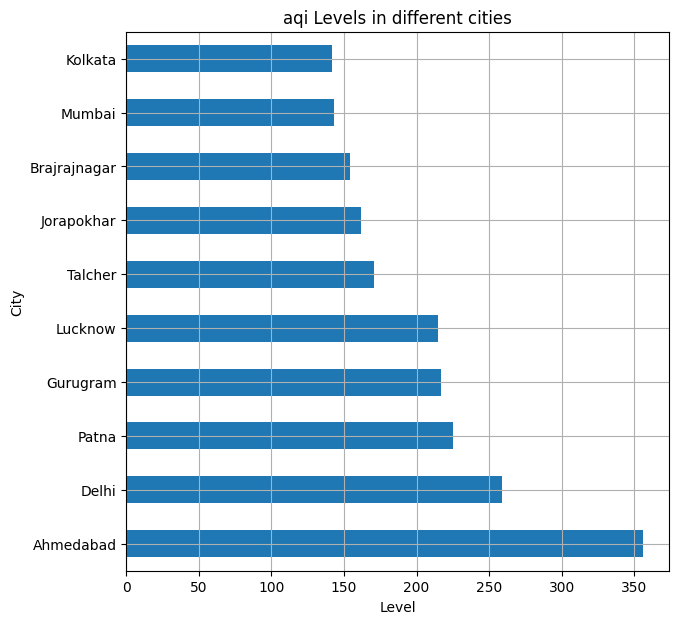

In [18]:
# Plotting the horizontal bar plot for cities against AQI level value.
city_AQI_values.head(10).plot(figsize=(7,7),kind="barh",title="aqi Levels in different cities",
                              xlabel="Level", ylabel="City",grid=True)

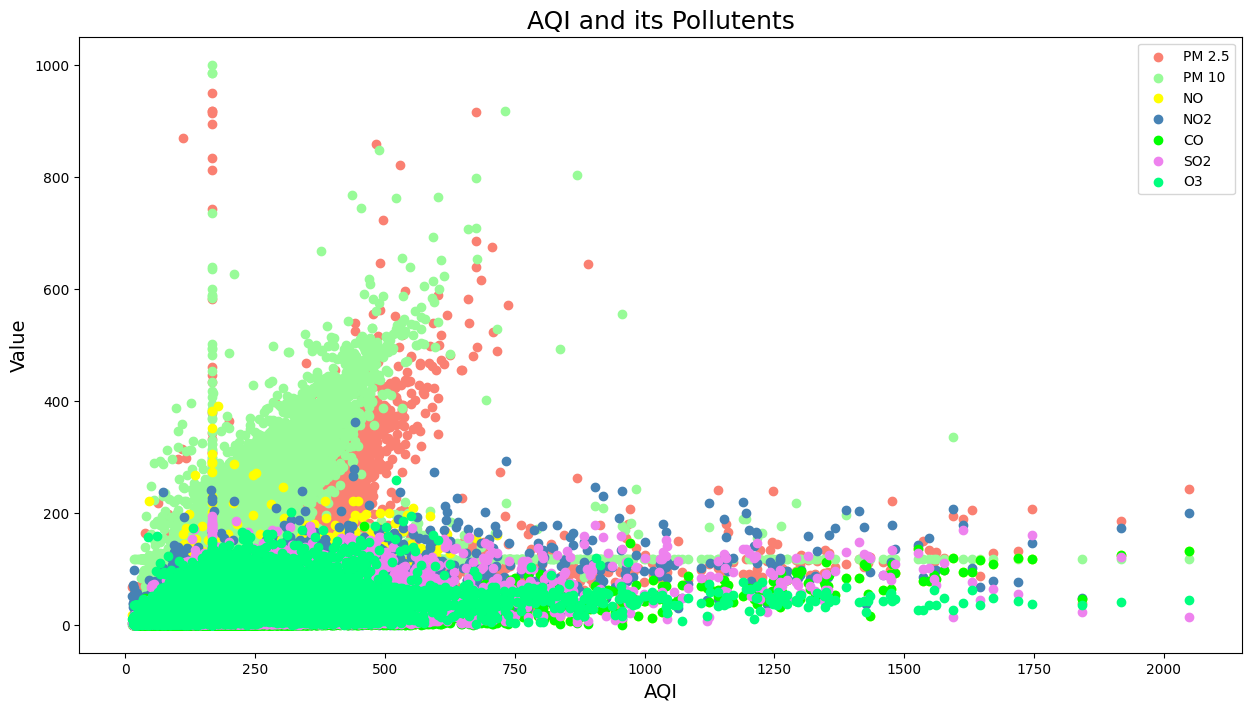

In [19]:
x=data['AQI']
y1=data['PM2.5']
y2=data['PM10']
y3=data['NO']
y4=data['NO2']
y5=data['CO']
y6=data['SO2']
y7=data['O3']
plt.figure(figsize=(15,8))
plt.scatter(x,y1,label='PM 2.5',color='salmon')
plt.scatter(x,y2,label='PM 10',color='palegreen')
plt.scatter(x,y3,label='NO',color='yellow')
plt.scatter(x,y4,label='NO2',color='steelblue')
plt.scatter(x,y5,label='CO',color='lime')
plt.scatter(x,y6,label='SO2',color='violet')
plt.scatter(x,y7,label='O3',color='springgreen')
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()

# Droping unwanted cloumns

In [20]:
data=data.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
data.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

<AxesSubplot:>

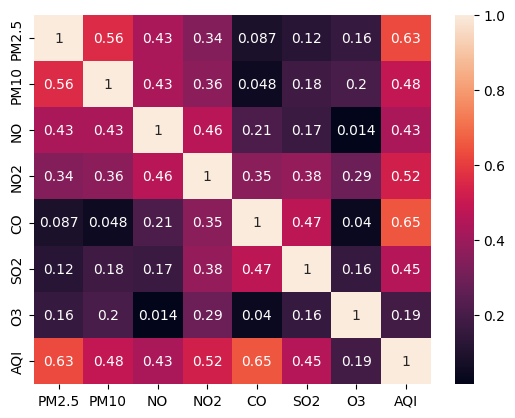

In [21]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [23]:
data.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67.45,118.13,0.92,18.22,0.92,27.64,133.36,166.46
1,67.45,118.13,0.97,15.69,0.97,24.55,34.06,166.46
2,67.45,118.13,17.40,19.30,17.40,29.07,30.70,166.46
3,67.45,118.13,1.70,18.48,1.70,18.59,36.08,166.46
4,67.45,118.13,22.10,21.42,22.10,39.33,39.31,166.46


In [24]:
# changing the data types

data = data.astype(int)
data.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166


# Importing the Libraries for model Building

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [26]:
# splitting the dataset

x = data[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]
y = data['AQI']

In [27]:
print(x.shape), print(y.shape)

(29531, 7)
(29531,)


(None, None)

# train test split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

# Linear Regression

In [30]:
model_linear = LinearRegression()

In [31]:
model_linear.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = model_linear.predict(x_test)

In [39]:
y_pred

array([ 76.7249618 , 268.5798224 , 216.9040865 , ...,  68.60006627,
       336.30150053,  71.87783102])

In [41]:
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 76.0%


# DecisionTreeRegressor

In [42]:
model_DTree = DecisionTreeRegressor()

In [43]:
model_DTree.fit(x_train, y_train)

DecisionTreeRegressor()

In [44]:
y_pred2 = model_DTree.predict(x_test)

In [45]:
y_pred2

array([ 86., 342., 181., ..., 117., 335.,  73.])

In [46]:
score_2 = r2_score(y_test, y_pred2)
print("The accuracy of our model is {}%".format(round(score_2, 2) *100))

The accuracy of our model is 75.0%


# RandomForestRegressor

In [48]:
model_random = RandomForestRegressor(n_estimators=100, random_state=42)

In [50]:
model_random.fit(x_train, y_train)
y_pred3 = model_random.predict(x_test)

In [51]:
score_3 = r2_score(y_test, y_pred3)
print("The accuracy of our model is {}%".format(round(score_3, 2) *100))

The accuracy of our model is 87.0%


# Save the file using pickle

In [52]:
import pickle

In [54]:
pickle.dump(model_random, open('model_random.pkl', 'wb'))